## Reinforcement Learning for Operational Research

#### Environments
See [or-gym repo](https://github.com/hubbs5/or-gym) implementation reference
* [Newsvendor-v0](https://arxiv.org/pdf/2008.06319.pdf)
* [NetworkManagement-v0](https://mdpi-res.com/d_attachment/processes/processes-09-00102/article_deploy/processes-09-00102.pdf)

Also of interest: 
* InvManagement-v0
* VehicleRouting-v0
* TSP-v1

#### Extensions
* Options for delivery: truck, train, boat, plane
    * Each has different time delay & costs
* single agent vs multi-agent (competing)

2nd MDP for international import vs exports
* objective 1: optimize import / exports for a given country
* objective 2: optimize globally
* baseline: six sigma (SOTA in human organization)


In [1]:
import or_gym
from or_gym.utils import create_env
import ray
import ray.rllib.agents.ppo as ppo
from ray import tune
from ppo import *

debug = True
sample_cpu = 12
sample_gpu = 0

def register_env(env_name, env_config={}):
    env = create_env(env_name)
    tune.register_env(env_name, 
        lambda env_name: env(env_name,
            env_config=env_config))


In [2]:
env_name = 'InvManagement-v3'
env = or_gym.make(env_name, calculate_mdp = False)
print(env.action_space)
print(env.observation_space)

In [3]:

# Environment and RL Configuration Settings
env_config = { }       
#     'lead_time': 10,
#     'max_inventory': 2000,
#     'max_order_quantity': 200,
#     'step_limit': 100,
#     'p_max': 100,    # Max sale price,
#     'h_max': 5 ,     # Max holding cost,
#     'k_max': 100 ,    # Max lost sales penalty,
#     'mu_max': 100  , # Max mean of the demand distribution,
# }

# Register environment
register_env(env_name, env_config)

rl_config['env'] = env_name
rl_config['env_config'] = env_config
rl_config['callbacks'] = None

In [4]:

# Initialize Ray and Build Agent
ray.init(ignore_reinit_error=True)
agent = ppo.PPOTrainer(env=env_name,
    config=rl_config)
 
results = []
for i in range(300):
    res = agent.train()
    results.append(res)
    # if (i+1) % 5 == 0:
    print('\rIter: {}\tReward: {:.2f}'.format(
            i+1, res['episode_reward_mean']), end='')
ray.shutdown()

2022-04-14 10:50:56,035	INFO ppo.py:249 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=28781) 2022-04-14 10:50:59,631	INFO rollout_worker.py:1729 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=28781) 2022-04-14 10:50:59,631	DEBUG rollout_worker.py:1560 -- Creating policy for default_policy
(RolloutWorker pid=28781) 2022-04-14 10:50:59,633	DEBUG catalog.py:720 -- Created preprocessor <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7fdd8a6076d0>: Box([0 0 0 0 0 0], [10 10 10 10 10 10], (6,), int32) -> (6,)
(RolloutWorker pid=28781) 2022-04-14 10:50:59,638	INFO torch_policy.py:162 -- TorchPolicy (worker=2) running on CPU.
(RolloutWorker pid=28781) 2022-04-14 10:50:59,655	DEBUG rollout_worker.py:730 -- Created rollout worker with env <ray.rllib.env.vector_env.VectorEnvWrapper object at 0x7fdd8a607af0> (<NetInvMgmtLostSalesEnv i

Iter: 1	Reward: 217.69

(RolloutWorker pid=28786) 2022-04-14 10:54:38,173	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=8.0, mean=3.667)
(RolloutWorker pid=28786) 2022-04-14 10:54:38,174	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.171, max=0.26, mean=-0.392)
(RolloutWorker pid=28786) 2022-04-14 10:54:38,174	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.171, max=0.26, mean=-0.392),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=0.0, max=9.0, mean=3.875),
(RolloutWorker pid=28786)                                   'prev

Iter: 2	Reward: 220.80

(RolloutWorker pid=28786) 2022-04-14 10:57:16,554	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=4.333)
(RolloutWorker pid=28786) 2022-04-14 10:57:16,554	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.382, max=0.978, mean=-0.127)
(RolloutWorker pid=28786) 2022-04-14 10:57:16,555	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.382, max=0.978, mean=-0.127),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=1.0, max=10.0, mean=6.25),
(RolloutWorker pid=28786)                                   'p

Iter: 3	Reward: 222.42

(RolloutWorker pid=28786) 2022-04-14 11:00:07,232	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-0.34, max=2.085, mean=0.589),
(RolloutWorker pid=28786)                                   'prev_action': None,
(RolloutWorker pid=28786)                                   'prev_reward': 0.0,
(RolloutWorker pid=28786)                                   'rnn_state': []},
(RolloutWorker pid=28786)                         'type': 'PolicyEvalData'}]}
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) 2022-04-14 11:00:07,234	INFO sampler.py:1083 -- Outputs of compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'defau

Iter: 4	Reward: 221.55

(RolloutWorker pid=28786) 2022-04-14 11:02:46,720	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=5.833)
(RolloutWorker pid=28786) 2022-04-14 11:02:46,721	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.517, max=1.64, mean=0.29)
(RolloutWorker pid=28786) 2022-04-14 11:02:46,721	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.517, max=1.64, mean=0.29),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=0.0, max=10.0, mean=4.25),
(RolloutWorker pid=28786)                                   'prev_re

Iter: 5	Reward: 223.04

(RolloutWorker pid=28786) 2022-04-14 11:05:23,261	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=9.0, mean=4.667)
(RolloutWorker pid=28786) 2022-04-14 11:05:23,261	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.524, max=1.707, mean=0.021)
(RolloutWorker pid=28786) 2022-04-14 11:05:23,262	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.524, max=1.707, mean=0.021),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=3.0, max=9.0, mean=6.875),
(RolloutWorker pid=28786)                                   'prev

Iter: 6	Reward: 219.57

(RolloutWorker pid=28786) 2022-04-14 11:07:57,728	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=8.0, mean=5.333)
(RolloutWorker pid=28786) 2022-04-14 11:07:57,728	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.173, max=1.033, mean=0.134)
(RolloutWorker pid=28786) 2022-04-14 11:07:57,729	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.173, max=1.033, mean=0.134),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=2.0, max=9.0, mean=4.625),
(RolloutWorker pid=28786)                                   'prev

Iter: 7	Reward: 218.64

(RolloutWorker pid=28786) 2022-04-14 11:10:33,271	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=6.0)
(RolloutWorker pid=28786) 2022-04-14 11:10:33,271	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-0.817, max=1.638, mean=0.363)
(RolloutWorker pid=28786) 2022-04-14 11:10:33,272	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-0.817, max=1.638, mean=0.363),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=1.0, max=10.0, mean=6.625),
(RolloutWorker pid=28786)                                   'prev

Iter: 8	Reward: 218.41

(RolloutWorker pid=28786) 2022-04-14 11:13:09,048	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=4.667)
(RolloutWorker pid=28786) 2022-04-14 11:13:09,048	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.176, max=1.46, mean=-0.064)
(RolloutWorker pid=28786) 2022-04-14 11:13:09,049	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.176, max=1.46, mean=-0.064),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=0.0, max=10.0, mean=4.5),
(RolloutWorker pid=28786)                                   'prev

Iter: 9	Reward: 219.09

(RolloutWorker pid=28786) 2022-04-14 11:15:46,012	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=4.667)
(RolloutWorker pid=28786) 2022-04-14 11:15:46,012	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.385, max=0.972, mean=0.019)
(RolloutWorker pid=28786) 2022-04-14 11:15:46,013	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.385, max=0.972, mean=0.019),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=0.0, max=9.0, mean=4.75),
(RolloutWorker pid=28786)                                   'prev

Iter: 10	Reward: 220.56

(RolloutWorker pid=28786) 2022-04-14 11:18:23,434	INFO sampler.py:625 -- Raw obs from env: { 0: { 'agent0': np.ndarray((6,), dtype=float64, min=0.0, max=9.0, mean=4.167)}}
(RolloutWorker pid=28786) 2022-04-14 11:18:23,434	INFO sampler.py:627 -- Info return from env: {0: {'agent0': {}}}
(RolloutWorker pid=28786) 2022-04-14 11:18:23,434	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=9.0, mean=4.167)
(RolloutWorker pid=28786) 2022-04-14 11:18:23,435	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.755, max=0.731, mean=-0.214)
(RolloutWorker pid=28786) 2022-04-14 11:18:23,435	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                       

Iter: 11	Reward: 220.75

(RolloutWorker pid=28786) 2022-04-14 11:20:59,372	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=4.667)
(RolloutWorker pid=28786) 2022-04-14 11:20:59,372	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.08, max=0.972, mean=0.014)
(RolloutWorker pid=28786) 2022-04-14 11:20:59,372	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.08, max=0.972, mean=0.014),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=2.0, max=9.0, mean=5.125),
(RolloutWorker pid=28786)                                   'prev_

Iter: 12	Reward: 222.37

(RolloutWorker pid=28786) 2022-04-14 11:23:34,573	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=4.833)
(RolloutWorker pid=28786) 2022-04-14 11:23:34,573	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.175, max=0.995, mean=0.029)
(RolloutWorker pid=28786) 2022-04-14 11:23:34,574	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.175, max=0.995, mean=0.029),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=1.0, max=9.0, mean=4.625),
(RolloutWorker pid=28786)                                   'pre

Iter: 13	Reward: 224.50

(RolloutWorker pid=28786) 2022-04-14 11:26:06,506	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=6.833)
(RolloutWorker pid=28786) 2022-04-14 11:26:06,506	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-0.215, max=1.636, mean=0.632)
(RolloutWorker pid=28786) 2022-04-14 11:26:06,507	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-0.215, max=1.636, mean=0.632),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=2.0, max=10.0, mean=5.25),
(RolloutWorker pid=28786)                                   'pre

Iter: 14	Reward: 221.86

(RolloutWorker pid=28786) 2022-04-14 11:28:40,098	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=10.0, mean=4.0)
(RolloutWorker pid=28786) 2022-04-14 11:28:40,099	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-1.748, max=0.971, mean=-0.283)
(RolloutWorker pid=28786) 2022-04-14 11:28:40,099	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                                   'obs': np.ndarray((6,), dtype=float64, min=-1.748, max=0.971, mean=-0.283),
(RolloutWorker pid=28786)                                   'prev_action': np.ndarray((8,), dtype=int32, min=2.0, max=10.0, mean=4.75),
(RolloutWorker pid=28786)                                   'pre

Iter: 15	Reward: 219.74

(RolloutWorker pid=28786) 2022-04-14 11:31:14,043	INFO sampler.py:625 -- Raw obs from env: { 0: { 'agent0': np.ndarray((6,), dtype=float64, min=0.0, max=7.0, mean=4.0)}}
(RolloutWorker pid=28786) 2022-04-14 11:31:14,043	INFO sampler.py:627 -- Info return from env: {0: {'agent0': {}}}
(RolloutWorker pid=28786) 2022-04-14 11:31:14,043	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((6,), dtype=float64, min=0.0, max=7.0, mean=4.0)
(RolloutWorker pid=28786) 2022-04-14 11:31:14,043	INFO sampler.py:859 -- Filtered obs: np.ndarray((6,), dtype=float64, min=-0.9, max=0.127, mean=-0.252)
(RolloutWorker pid=28786) 2022-04-14 11:31:14,044	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28786) 
(RolloutWorker pid=28786) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28786)                                   'env_id': 0,
(RolloutWorker pid=28786)                                   'info': {},
(RolloutWorker pid=28786)                             

Iter: 16	Reward: 223.01

KeyboardInterrupt: 

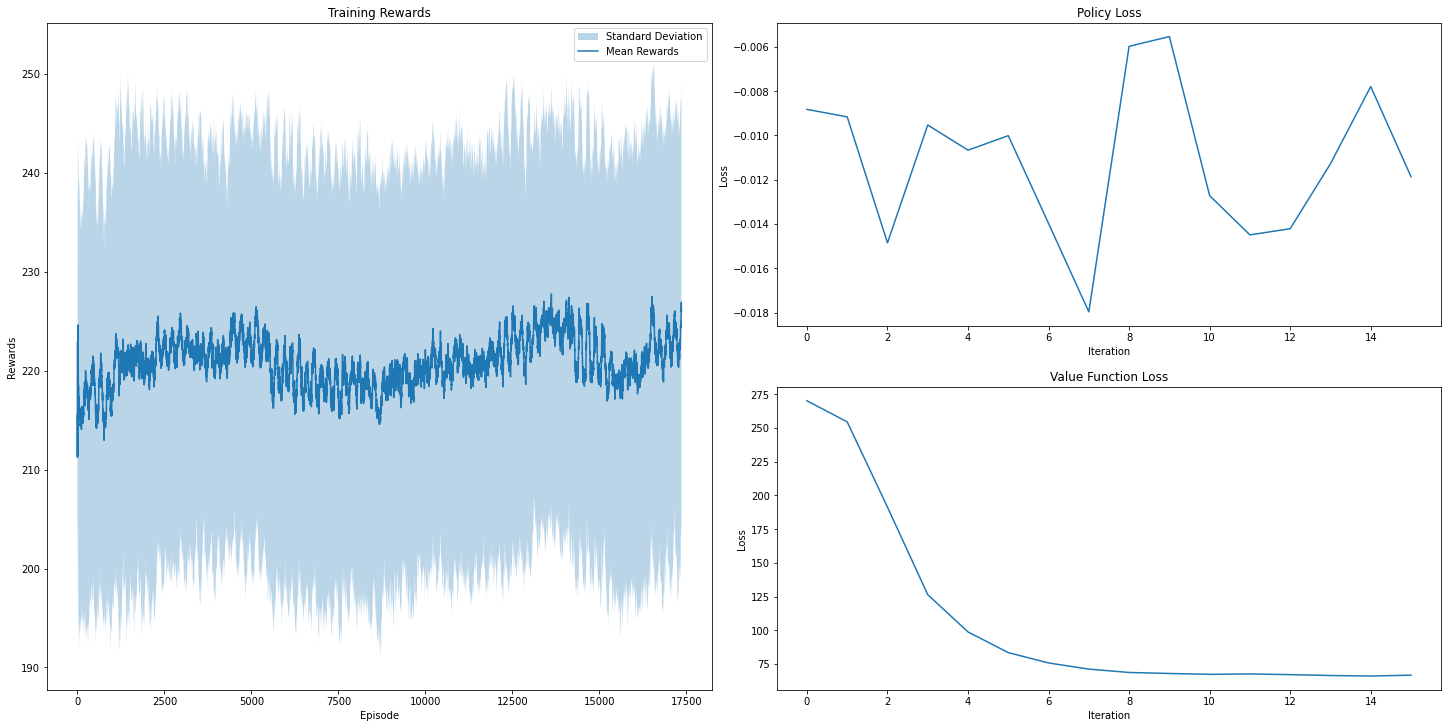

In [5]:
plot_results(results)